In [114]:
#Load the libraryss
import warnings
warnings.filterwarnings("ignore")
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
%matplotlib inline

# 1. Data Understanding

## 1.1 Import data

In [115]:
loan_data = pd.read_csv("loan.csv")
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## 1.2 Analyse columns

In [116]:
loan_data.shape

(39717, 111)

In [117]:
# loan_data data frame contains 111 columns. Get column names and split them into buckets of 20, so that column info can be printed
column_names = loan_data.columns

In [118]:
print(loan_data[column_names[0:20]].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  object 
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   sub_grade            39717 non-null  object 
 10  emp_title            37258 non-null  object 
 11  emp_length           38642 non-null  object 
 12  home_ownership       39717 non-null  object 
 13  annual_inc           39717 non-null  float64
 14  verification_status  39717 non-null  object 
 15  issue_d              39717 non-null 

In [119]:
print(loan_data[column_names[20:40]].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   purpose                 39717 non-null  object 
 1   title                   39706 non-null  object 
 2   zip_code                39717 non-null  object 
 3   addr_state              39717 non-null  object 
 4   dti                     39717 non-null  float64
 5   delinq_2yrs             39717 non-null  int64  
 6   earliest_cr_line        39717 non-null  object 
 7   inq_last_6mths          39717 non-null  int64  
 8   mths_since_last_delinq  14035 non-null  float64
 9   mths_since_last_record  2786 non-null   float64
 10  open_acc                39717 non-null  int64  
 11  pub_rec                 39717 non-null  int64  
 12  revol_bal               39717 non-null  int64  
 13  revol_util              39667 non-null  object 
 14  total_acc               39717 non-null

In [120]:
print(loan_data[column_names[40:60]].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   total_rec_prncp              39717 non-null  float64
 1   total_rec_int                39717 non-null  float64
 2   total_rec_late_fee           39717 non-null  float64
 3   recoveries                   39717 non-null  float64
 4   collection_recovery_fee      39717 non-null  float64
 5   last_pymnt_d                 39646 non-null  object 
 6   last_pymnt_amnt              39717 non-null  float64
 7   next_pymnt_d                 1140 non-null   object 
 8   last_credit_pull_d           39715 non-null  object 
 9   collections_12_mths_ex_med   39661 non-null  float64
 10  mths_since_last_major_derog  0 non-null      float64
 11  policy_code                  39717 non-null  int64  
 12  application_type             39717 non-null  object 
 13  annual_inc_joint

In [121]:
print(loan_data[column_names[60:80]].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   open_il_6m                0 non-null      float64
 1   open_il_12m               0 non-null      float64
 2   open_il_24m               0 non-null      float64
 3   mths_since_rcnt_il        0 non-null      float64
 4   total_bal_il              0 non-null      float64
 5   il_util                   0 non-null      float64
 6   open_rv_12m               0 non-null      float64
 7   open_rv_24m               0 non-null      float64
 8   max_bal_bc                0 non-null      float64
 9   all_util                  0 non-null      float64
 10  total_rev_hi_lim          0 non-null      float64
 11  inq_fi                    0 non-null      float64
 12  total_cu_tl               0 non-null      float64
 13  inq_last_12m              0 non-null      float64
 14  acc_op

In [122]:
print(loan_data[column_names[80:100]].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   mo_sin_old_il_acct              0 non-null      float64
 1   mo_sin_old_rev_tl_op            0 non-null      float64
 2   mo_sin_rcnt_rev_tl_op           0 non-null      float64
 3   mo_sin_rcnt_tl                  0 non-null      float64
 4   mort_acc                        0 non-null      float64
 5   mths_since_recent_bc            0 non-null      float64
 6   mths_since_recent_bc_dlq        0 non-null      float64
 7   mths_since_recent_inq           0 non-null      float64
 8   mths_since_recent_revol_delinq  0 non-null      float64
 9   num_accts_ever_120_pd           0 non-null      float64
 10  num_actv_bc_tl                  0 non-null      float64
 11  num_actv_rev_tl                 0 non-null      float64
 12  num_bc_sats                     

In [123]:
print(loan_data[column_names[100:]].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   num_tl_30dpd                0 non-null      float64
 1   num_tl_90g_dpd_24m          0 non-null      float64
 2   num_tl_op_past_12m          0 non-null      float64
 3   pct_tl_nvr_dlq              0 non-null      float64
 4   percent_bc_gt_75            0 non-null      float64
 5   pub_rec_bankruptcies        39020 non-null  float64
 6   tax_liens                   39678 non-null  float64
 7   tot_hi_cred_lim             0 non-null      float64
 8   total_bal_ex_mort           0 non-null      float64
 9   total_bc_limit              0 non-null      float64
 10  total_il_high_credit_limit  0 non-null      float64
dtypes: float64(11)
memory usage: 3.3 MB
None


In [124]:
# print numerical column stats
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# 2. Data Cleaning

## 2.1 Cleanup null values
loan_data.info() shows many columns contains zero non-null values, means all values are null. Some columns has very few non-null values which doesn't make sense in this analysis. Columns with a null precentage more than 70 can be removed from the data frame.

In [125]:
# Get column names where null percent is above 70.
cols_with_null_70_or_more = ((loan_data.isna().sum()/len(loan_data)) * 100 > 70)
column_names_with_null_70_or_more = cols_with_null_70_or_more[cols_with_null_70_or_more == True].index

In [126]:
# drop columns where null percent is above 70. 
loan_data.drop(columns=column_names_with_null_70_or_more, inplace=True)

In [127]:
# verify column count after removing null columns
loan_data.shape

(39717, 55)

## 2.2 Remove Customer behavior variables
Customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. Below mentioned customer behavior columns can be removed. 
 - 'delinq_2yrs', 
 - 'earliest_cr_line', 
 - 'inq_last_6mths', 
 - 'open_acc',
 - 'pub_rec',
 - 'revol_bal',
 - 'revol_util',
 - 'total_acc',
 - 'out_prncp',
 - 'out_prncp_inv',
 - 'total_pymnt',
 - 'total_pymnt_inv',
 - 'total_rec_prncp',
 - 'total_rec_int',
 - 'total_rec_late_fee',
 - 'recoveries',
 - 'collection_recovery_fee',
 - 'last_pymnt_d',
 - 'last_pymnt_amnt',
 - 'last_credit_pull_d',
 - 'application_type'

In [128]:
customer_behavior_cols = ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type', 'emp_title']
loan_data.drop(columns=customer_behavior_cols, inplace=True)

In [129]:
# verify column count after removing customer behavior columns
loan_data.shape

(39717, 33)

## 2.3 Remove columns with single value
Columns with single value doesnt impact the analysis. These columns can be removed.

In [130]:
# use loan_data.describe() to view numerical column stats. For numerical columns with single value, min() and max() will be same.
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,14035.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,35.900962,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,22.020060,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,18.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,34.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,52.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,120.000000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [131]:
# Get the column names where min and max are same and drop them.
cols_where_value_is_same = loan_data.min() == loan_data.max()
column_names_where_value_is_same = cols_where_value_is_same[cols_where_value_is_same == True].index

loan_data.drop(columns=column_names_where_value_is_same, inplace=True)

In [132]:
# verify column count after removing columns with single value
loan_data.shape

(39717, 25)

In [133]:
# verify numerical stats after removing columns with single value
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,mths_since_last_delinq,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,14035.000000,39020.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,35.900962,0.043260
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,22.020060,0.204324
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,18.000000,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,34.000000,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,52.000000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,120.000000,2.000000


# 3 Data Analysis
identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan

## 3.1 Analyse all columns
Analyse all remianing columns using value_counts() to understand different values

In [134]:
# print all column names
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'mths_since_last_delinq', 'pub_rec_bankruptcies'],
      dtype='object')


### 3.1.1 id

In [135]:
(loan_data.id.value_counts() > 1).sum()

0

In [136]:
# This is a unique id and doesn't impact the analysis. So this column can be removed
loan_data.drop(columns=['id'], inplace=True)

### 3.1.2 member_id

In [137]:
(loan_data.member_id.value_counts() > 1).sum()

0

In [138]:
# This is a unique id and doesn't impact the analysis. So this column can be removed
loan_data.drop(columns=['member_id'], inplace=True)

### 3.1.3 issue_d

In [139]:
# Dropping issue_d as we are not planning to derive any month/year wise recommendation  
loan_data.drop(columns=['issue_d'], inplace=True)

### 3.1.4 loan_amnt

In [140]:
loan_data.loan_amnt.value_counts()

10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: loan_amnt, Length: 885, dtype: int64

### 3.1.5 funded_amnt

In [141]:
loan_data.funded_amnt.value_counts()

10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
26250       1
24725       1
31750       1
22625       1
22350       1
Name: funded_amnt, Length: 1041, dtype: int64

### 3.1.6 funded_amnt_inv

In [142]:
loan_data.funded_amnt_inv.value_counts()

5000.000000     1309
10000.000000    1275
6000.000000     1200
12000.000000    1069
8000.000000      900
                ... 
4944.213109        1
18400.281660       1
14659.820000       1
6294.151315        1
11808.924370       1
Name: funded_amnt_inv, Length: 8205, dtype: int64

### 3.1.7 term

In [143]:
loan_data.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

### 3.1.8 int_rate

In [144]:
loan_data.int_rate.value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64

In [145]:
# remove % from values and convert to float
loan_data.int_rate = loan_data.int_rate.apply(lambda x: x[:-1] if x[-1] == '%' else x).astype(float)

### 3.1.9 installment

In [146]:
loan_data.installment.value_counts()

311.11     68
180.96     59
311.02     54
150.80     48
368.45     46
           ..
1224.46     1
63.44       1
157.67      1
492.34      1
255.43      1
Name: installment, Length: 15383, dtype: int64

### 3.1.10 grade

In [147]:
loan_data.grade.value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

### 3.1.11 sub_grade

In [148]:
loan_data.sub_grade.value_counts()

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

### 3.1.12 emp_length

In [149]:
loan_data.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

### 3.1.13 home_ownership

In [150]:
loan_data.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

### 3.1.14 annual_inc

In [151]:
loan_data.annual_inc.value_counts()

60000.0    1505
50000.0    1057
40000.0     876
45000.0     830
30000.0     825
           ... 
56820.0       1
45314.0       1
53913.0       1
62880.0       1
27376.0       1
Name: annual_inc, Length: 5318, dtype: int64

### 3.1.15 verifiction status

In [152]:
loan_data.verification_status.value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

### 3.1.16 loan_status

This is the target variable that decides if it's a good/bad loan

In [153]:
loan_data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [154]:
# loan_status with value 'Current' are neither fully paid not defaulted, so removing rows with loan_status Current.
loan_data = loan_data[loan_data.loan_status != 'Current']

### 3.1.17 url

In [155]:
(loan_data.url.value_counts() > 1).sum()

0

In [156]:
# This is a unique url and doesn't impact the analysis. So this column can be removed
loan_data.drop(columns=['url'], inplace=True)

### 3.1.18 desc

In [157]:
loan_data.desc.value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      209
Debt Consolidation                                                                                                                                                                                                                                                                                                                                                            

In [158]:
# This is just a description and doesn't impact the analysis. So this column can be removed
loan_data.drop(columns=['desc'], inplace=True)

### 3.1.19 purpose

In [159]:
loan_data.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

### 3.1.20 title

In [160]:
loan_data.title.value_counts()

Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: title, Length: 19297, dtype: int64

### 3.1.21 zip_code

In [161]:
loan_data.zip_code.value_counts()

100xx    583
945xx    531
112xx    502
606xx    493
070xx    455
        ... 
463xx      1
381xx      1
592xx      1
414xx      1
469xx      1
Name: zip_code, Length: 822, dtype: int64

### 3.1.22 addr_state

In [162]:
loan_data.addr_state.value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

### 3.1.23 dti

In [163]:
loan_data.dti.value_counts()

0.00     178
12.00     46
18.00     45
19.20     39
13.20     39
        ... 
28.95      1
25.85      1
25.77      1
27.20      1
25.43      1
Name: dti, Length: 2853, dtype: int64

### 3.1.24 mths_since_last_delinq

In [164]:
loan_data.mths_since_last_delinq.value_counts()

0.0      443
15.0     244
23.0     243
30.0     243
24.0     236
        ... 
107.0      1
85.0       1
97.0       1
95.0       1
115.0      1
Name: mths_since_last_delinq, Length: 95, dtype: int64

### 3.1.25 pub_rec_bankruptencies

In [165]:
loan_data.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

### 3.2 Verify data frame

In [166]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,860xx,AZ,27.65,NaN,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,bike,309xx,GA,1.00,NaN,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,real estate business,606xx,IL,8.72,NaN,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,personel,917xx,CA,20.00,35.0,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,NaN,0.0


In [167]:
loan_data.shape

(38577, 20)

In [168]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  int64  
 1   funded_amnt             38577 non-null  int64  
 2   funded_amnt_inv         38577 non-null  float64
 3   term                    38577 non-null  object 
 4   int_rate                38577 non-null  float64
 5   installment             38577 non-null  float64
 6   grade                   38577 non-null  object 
 7   sub_grade               38577 non-null  object 
 8   emp_length              37544 non-null  object 
 9   home_ownership          38577 non-null  object 
 10  annual_inc              38577 non-null  float64
 11  verification_status     38577 non-null  object 
 12  loan_status             38577 non-null  object 
 13  purpose                 38577 non-null  object 
 14  title                   38566 non-null

## 3.3 Plots

In [203]:
def plot_numerical_percentage(col_name, x_name, bins_val = 10):
    plt.xticks(rotation = 90)
    df = loan_data
    bucket_col = x_name
    percent_col = "Charged Off" + " Percentage"
    df[bucket_col] = pd.cut(df[col_name], bins=bins_val)
    df = pd.pivot_table(data=df, index=bucket_col, columns="loan_status", values=col_name, aggfunc = np.count_nonzero, fill_value = 0)
    df[percent_col] = (df['Charged Off'] / (df['Charged Off'] + df['Fully Paid'])) * 100

    sns.barplot(x=df.index, y=df[percent_col])
    plt.show()

In [204]:
def plot_numerical(col_name, x_name, bins_val = 10):
    plt.figure(figsize = (10, 4))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(loan_data.loan_status, loan_data[col_name])
    
    plt.subplot(1, 2, 2)
    plot_numerical_percentage(col_name, x_name, bins_val)

    plt.show()

In [205]:
def plot_categorical_percentage(col_name):
    plt.xticks(rotation = 90)
    df = loan_data
    percent_col = "Charged Off" + " Percentage"
    df = pd.pivot_table(data=df, index=col_name, columns="loan_status", values='loan_amnt', aggfunc = np.count_nonzero, fill_value = 0)
    df[percent_col] = (df['Charged Off'] / (df['Charged Off'] + df['Fully Paid'])) * 100

    sns.barplot(x=df.index, y=df[percent_col])
    plt.show()

In [206]:
def plot_categorical(col_name):
    data = loan_data[[col_name, 'loan_status']]
    data['count'] = data[col_name]
    data_pivot = pd.pivot_table(data, values='count', index=col_name, columns='loan_status', aggfunc='count')
    data_pivot.plot(kind="bar", stacked="True")
    
    plt.show()

    plot_categorical_percentage(col_name)


### loan_amnt vs loan_status

  - Charged Off percent increases with loan_amnt 

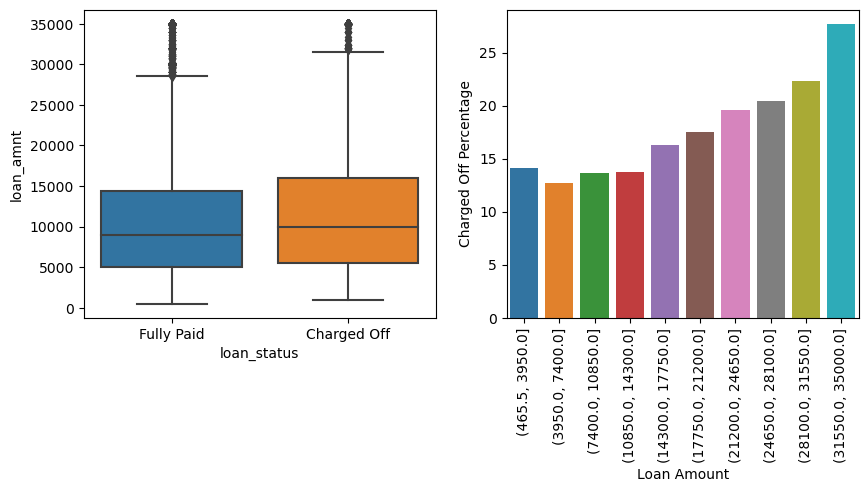

In [210]:
plot_numerical('loan_amnt', "Loan Amount", 10)

### term vs loan_status
 - Charged Off percent is considerably higher for term '60 months' 

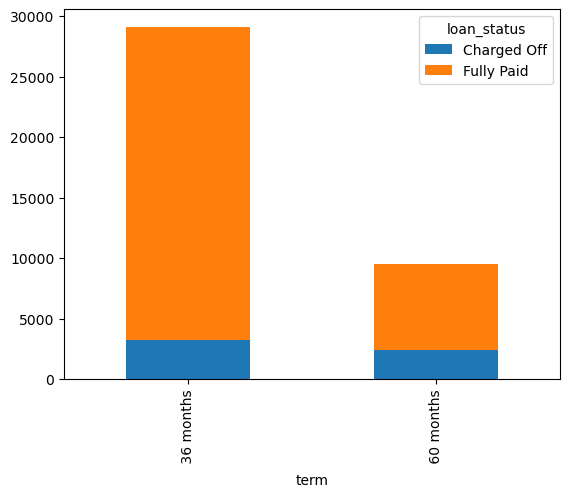

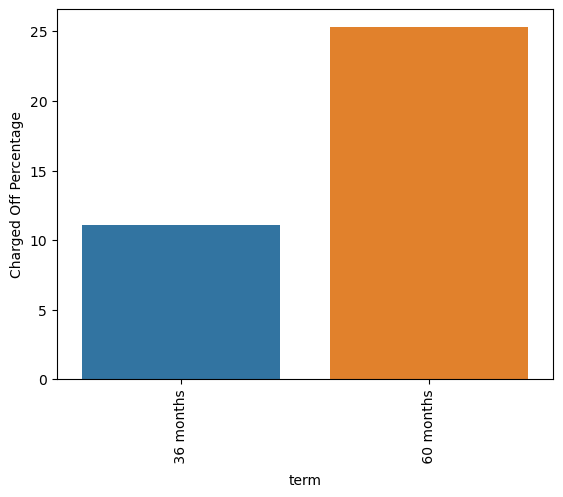

In [174]:
plot_categorical('term')


### int_rate vs loan_status
- Charged Off percent increases with interest rate 

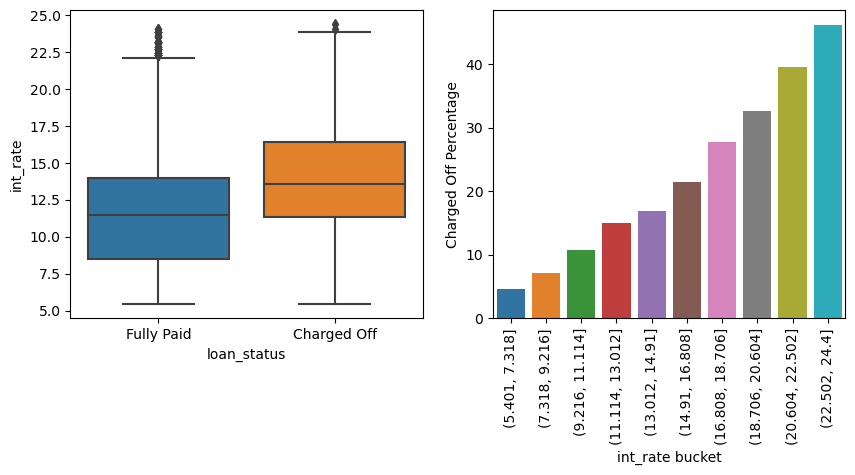

In [175]:
plot_numerical('int_rate')

### installment vs loan_status

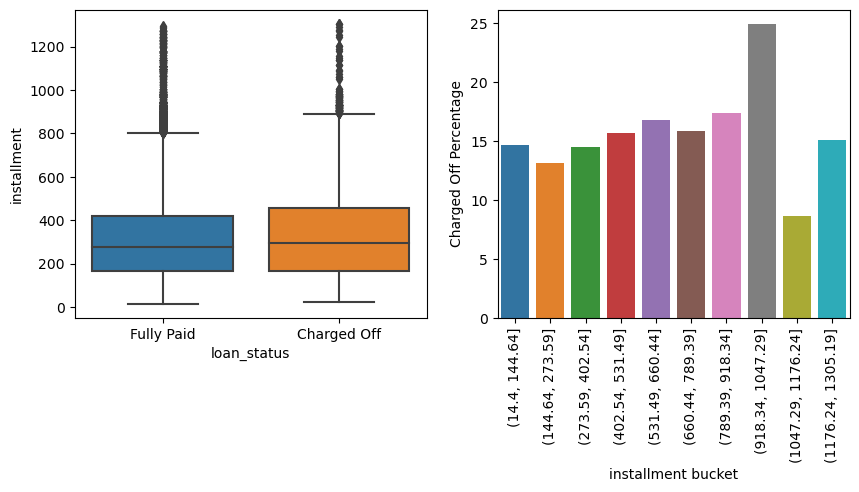

In [176]:
plot_numerical('installment')

### grade vs loan_status
 - Number of Charged Off loans is more for grades B, C and D
 - Percentage of Charged Off loans increases as grades go up

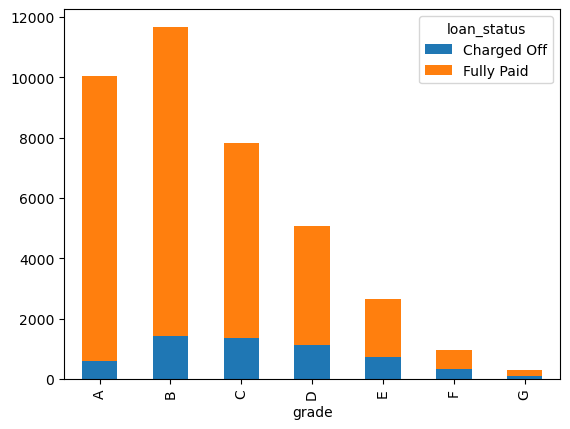

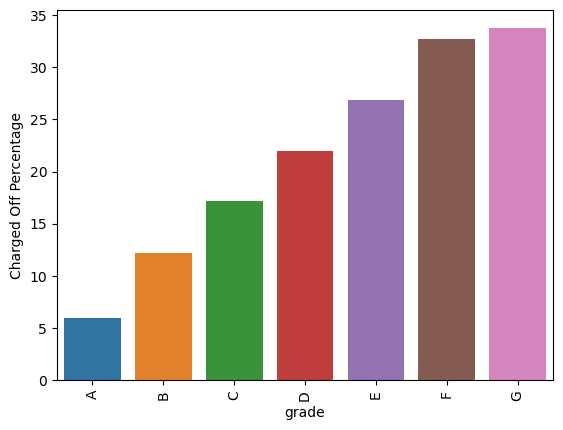

In [177]:
plot_categorical('grade')

### sub_grade vs loan_status
- Number of Charged Off loans is more for sub grades B2,B3,B4,B5, C1,C2,C3,C4 and D2,D3,D4,D5
- Percentage of Charged Off loans increases as sub grades go up

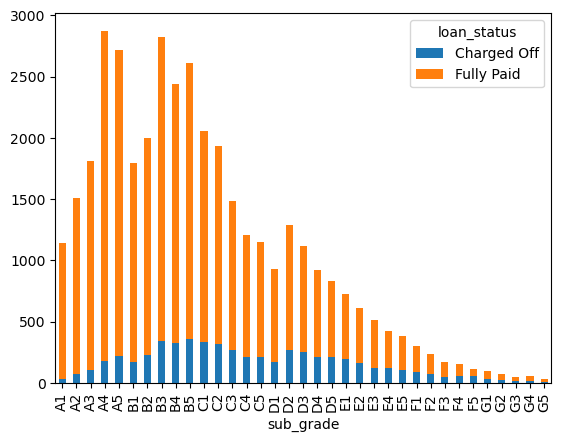

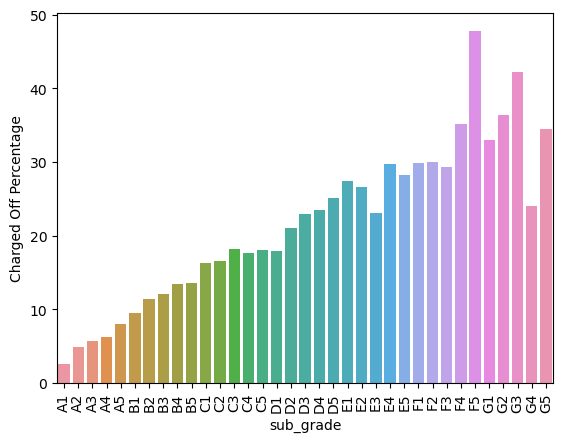

In [178]:
plot_categorical('sub_grade')

### home_ownership vs loan_status
- Number of Charged Off loans is more when home ownership is 'Mortgage' or 'Rent'
- Percentage of Charged Off loans is high when home ownership is 'Other'

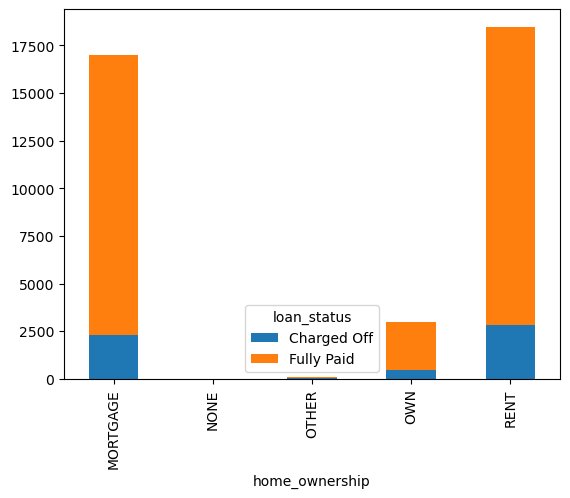

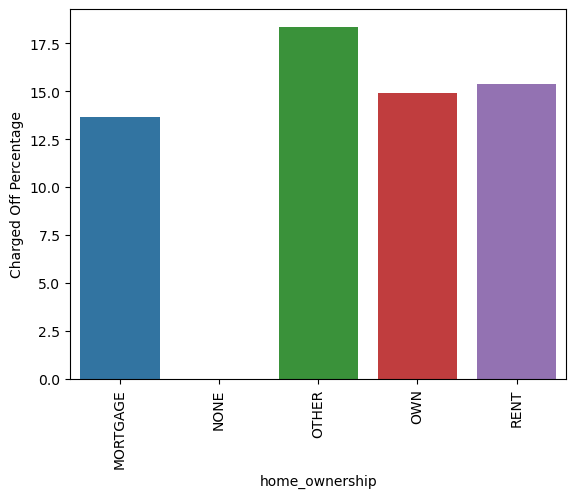

In [179]:
plot_categorical('home_ownership')

### emp_length vs loan_status

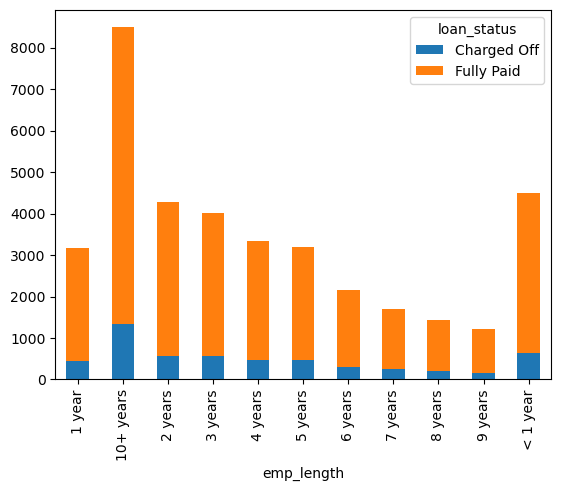

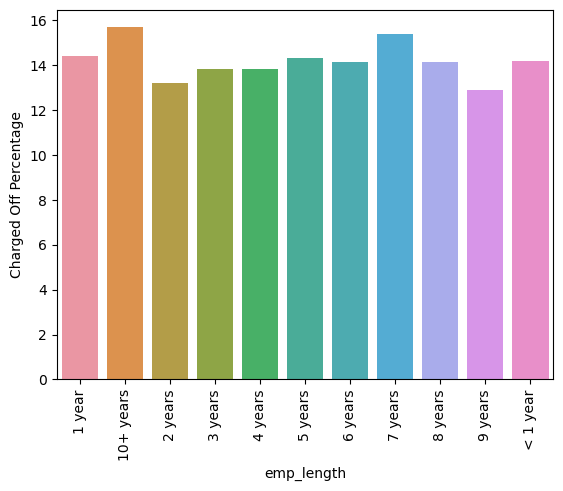

In [180]:
plot_categorical('emp_length')

### annual_inc vs loan_status
 - 25, 50 and 75 Percentile values are low for charged off loans. This indicates as annual income decreases, chances of charged off loans increases.
 - Percentage of Charged Off loans increases as annual income decrease.

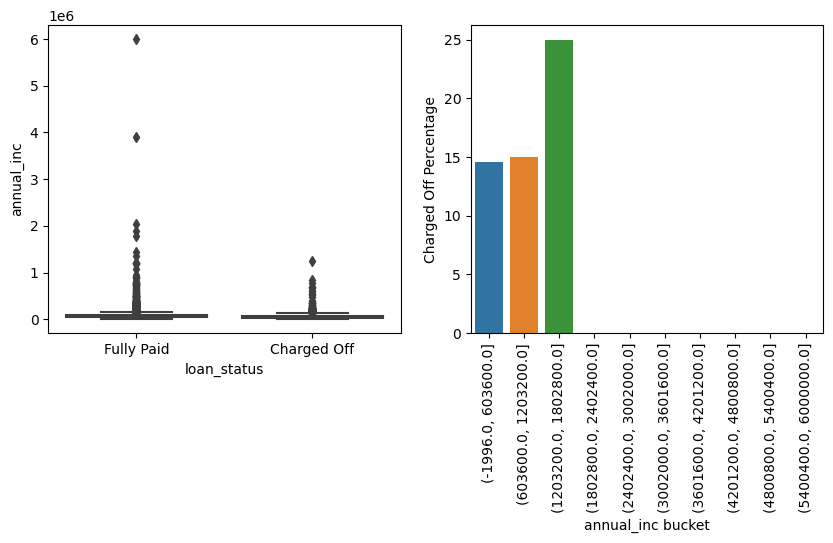

In [181]:
plot_numerical('annual_inc')

In [182]:
# Box plots are not proper due to outliers. Followed trial and error and removed all outliers above 96 percentile.
loan_data = loan_data[loan_data.annual_inc < loan_data.annual_inc.quantile(.96)]

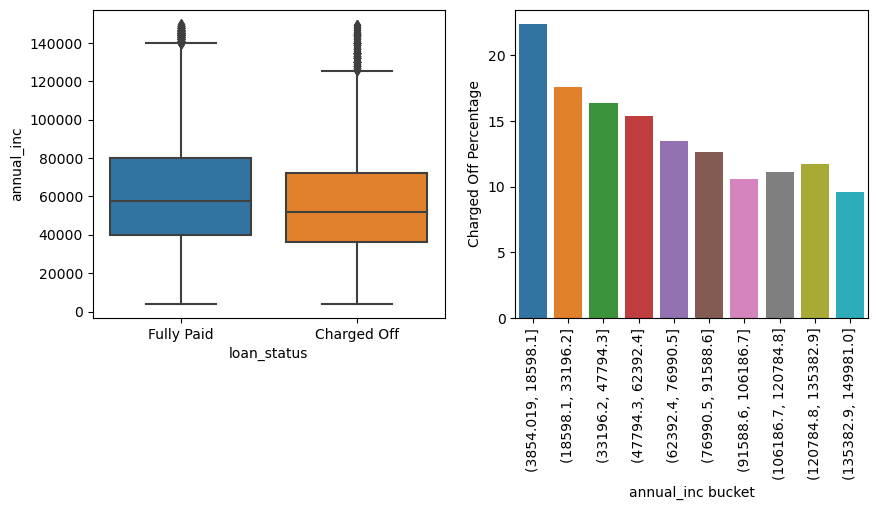

In [183]:
plot_numerical('annual_inc')

### verification_status vs loan_status

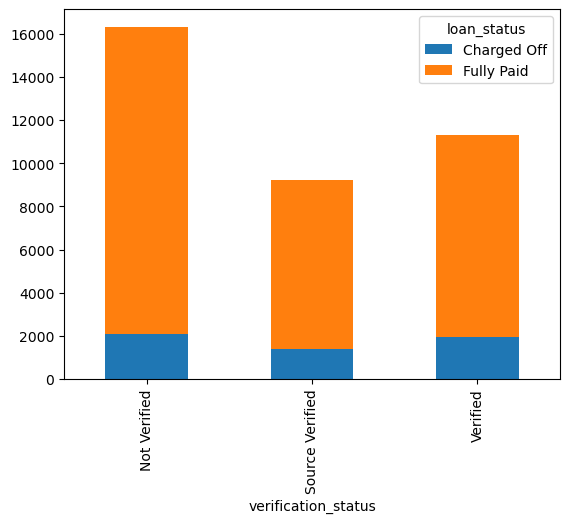

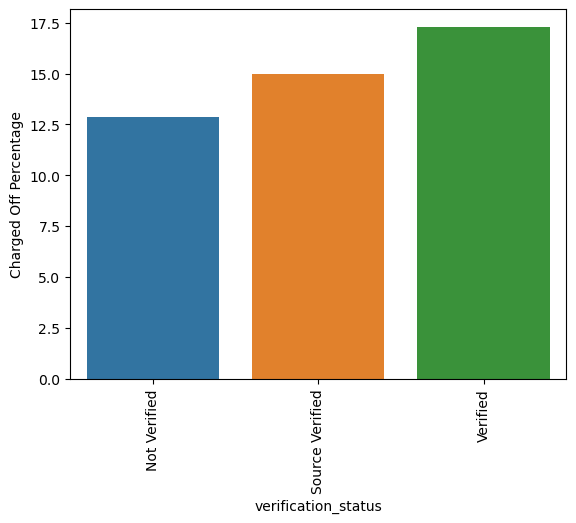

In [184]:
plot_categorical('verification_status')

### purpose vs loan_status
- Number of Charged Off loans is more for when purpose is 'debt_consolidation', 'credit_card' or 'other'
- Percentage of Charged Off loans high for small business, renewable energy and educational.

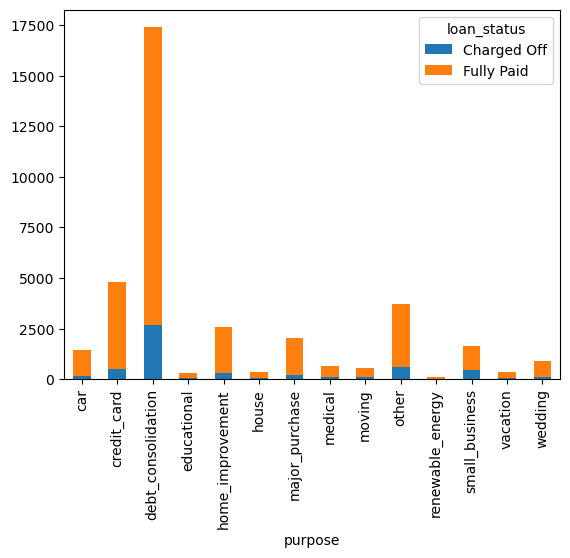

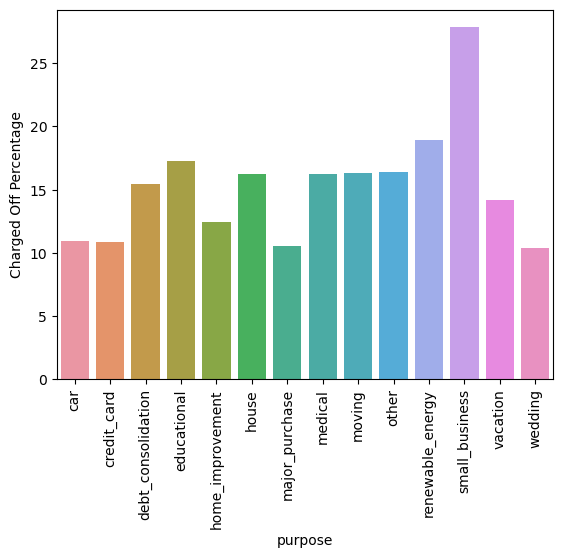

In [185]:
plot_categorical('purpose')

### dti vs loan_status
- Percentage of Charged Off loans increases as debt to income ratio goes up

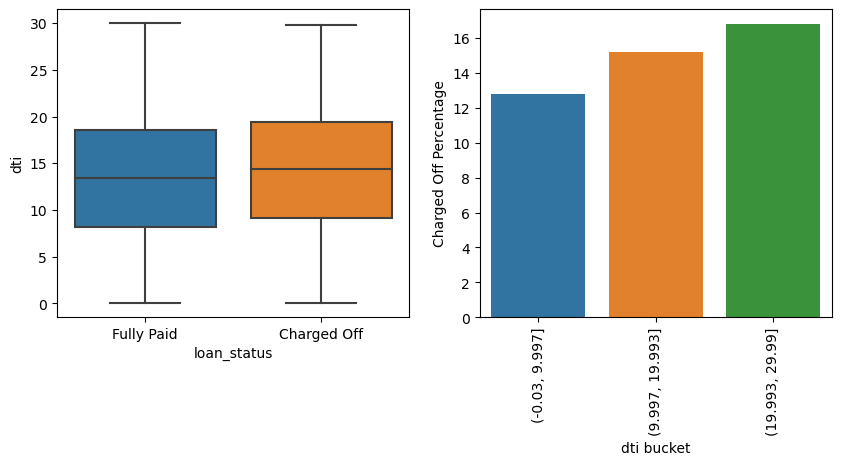

In [186]:
plot_numerical('dti', 3)

### mths_since_last_delinq vs loan_status

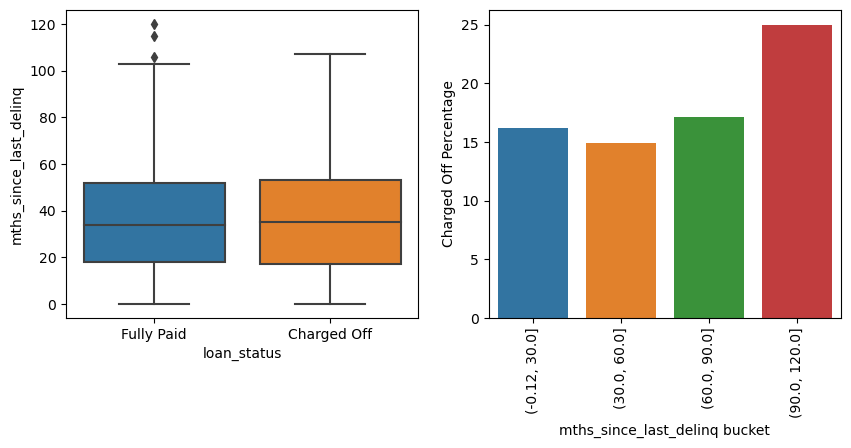

In [187]:
plot_numerical('mths_since_last_delinq', 4)

### pub_rec_bankruptencies vs loan_status

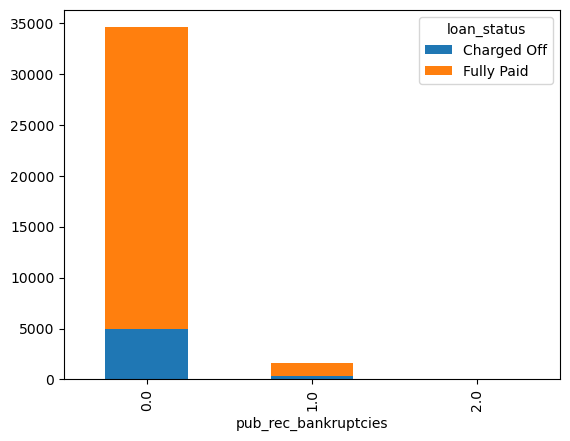

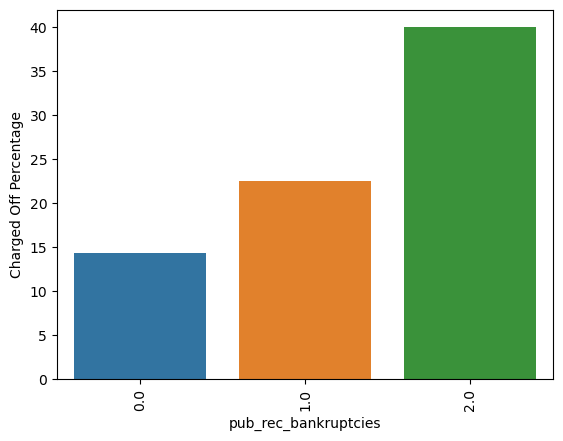

In [188]:
plot_categorical('pub_rec_bankruptcies')

### addr_state vs annual_inc, addr_state vs loan_amnt

 - For state 'WY' number of Charged Off loans are very high

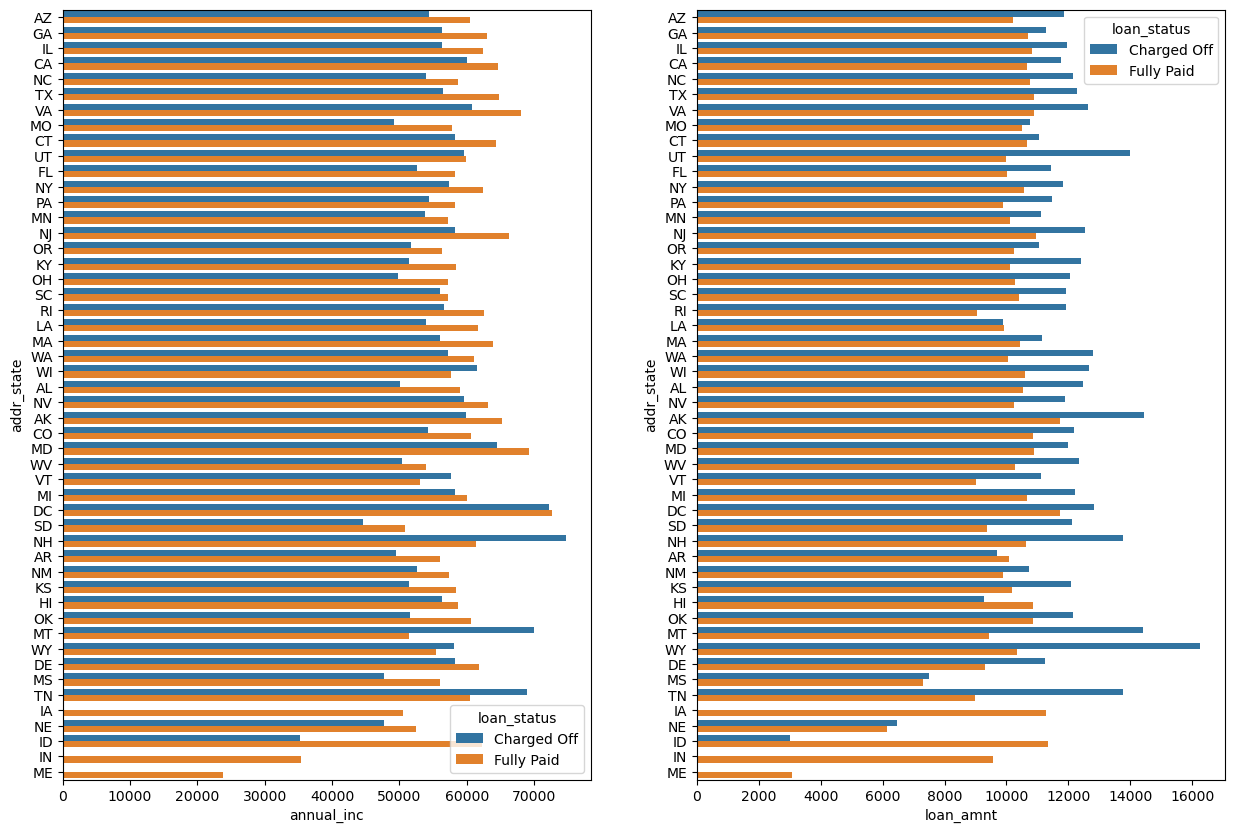

In [189]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot(data =loan_data,x='annual_inc', y='addr_state', hue ='loan_status', hue_order=['Charged Off', 'Fully Paid'], ci=None)

plt.subplot(1,2,2)
sns.barplot(data =loan_data,x='loan_amnt', y='addr_state', hue ='loan_status', hue_order=['Charged Off', 'Fully Paid'], ci=None)
plt.show()

In [190]:
pair_plt = loan_data[['loan_amnt' ,'annual_inc', 'term','dti','int_rate','loan_status']]

<Figure size 1500x1000 with 0 Axes>

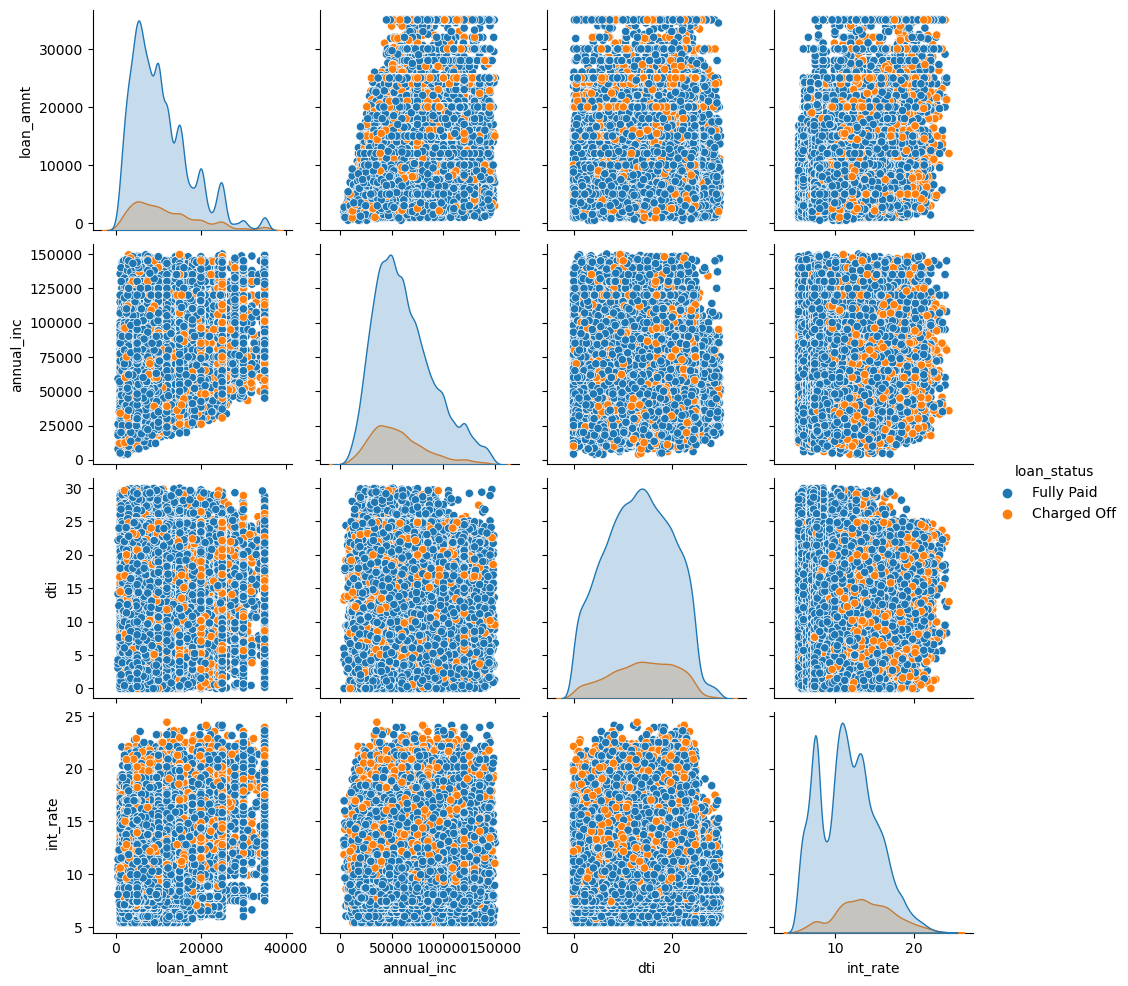

In [191]:
plt.figure(figsize=(15,10))
sns.pairplot(pair_plt, hue = 'loan_status')
plt.show()

 - Charged off loans are more when annual income is more
 - Charged off loans are more when int_rate is high

## 3.2 Correlation Analysis

In [192]:
loan_data.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,mths_since_last_delinq,pub_rec_bankruptcies
loan_amnt,1.000000,0.981958,0.936851,0.291974,0.931542,0.403162,0.088930,0.021754,-0.030340
funded_amnt,0.981958,1.000000,0.954807,0.296914,0.957219,0.398989,0.088108,0.021533,-0.031302
funded_amnt_inv,0.936851,0.954807,1.000000,0.289537,0.902842,0.381982,0.095907,0.078246,-0.035902
int_rate,0.291974,0.296914,0.289537,1.000000,0.269807,0.054509,0.112057,-0.053157,0.086679
installment,0.931542,0.957219,0.902842,0.269807,1.000000,0.398374,0.077752,0.007193,-0.027645
annual_inc,0.403162,0.398989,0.381982,0.054509,0.398374,1.000000,-0.075518,-0.003961,-0.008200
dti,0.088930,0.088108,0.095907,0.112057,0.077752,-0.075518,1.000000,0.067410,0.004378
mths_since_last_delinq,0.021754,0.021533,0.078246,-0.053157,0.007193,-0.003961,0.067410,1.000000,0.024122
pub_rec_bankruptcies,-0.030340,-0.031302,-0.035902,0.086679,-0.027645,-0.008200,0.004378,0.024122,1.000000


# 4 Recommendations

**Loan Amount:**

Possibility of loan being Charged Off increases as the loan amount goes high. 

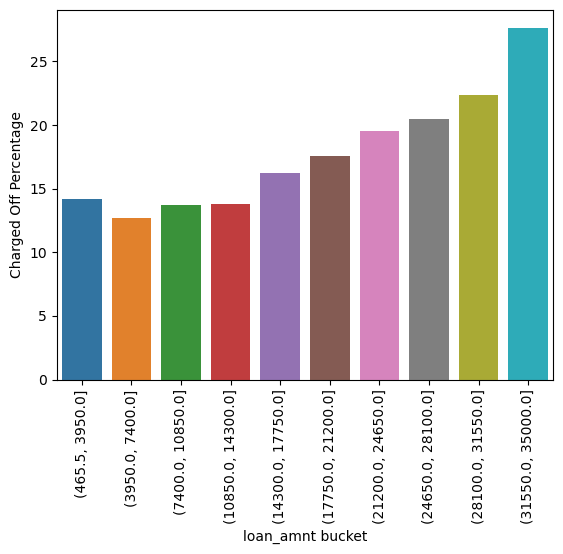

In [193]:
plot_numerical_percentage('loan_amnt')

**Loan Term:**

Charged Off percent is considerably higher for term '60 months' 

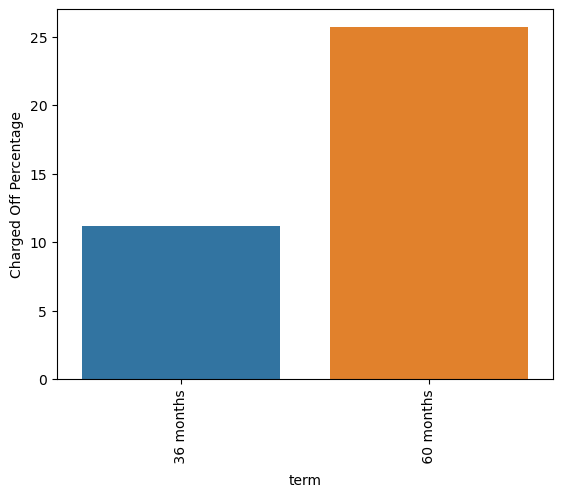

In [194]:
plot_categorical_percentage('term')

**Interest Rate:**

Charged Off percent increases with interest rate.

Scatter plot between int rate and loan amount, we can observe that the number of defaulters increases as interest rate increases, irrespective of the loan amount. 

People pay off loans on time when interest and loan amount are low.

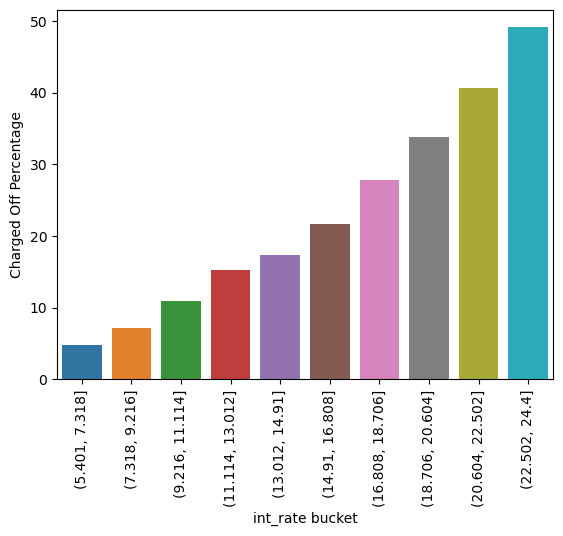

In [195]:
plot_numerical_percentage('int_rate')

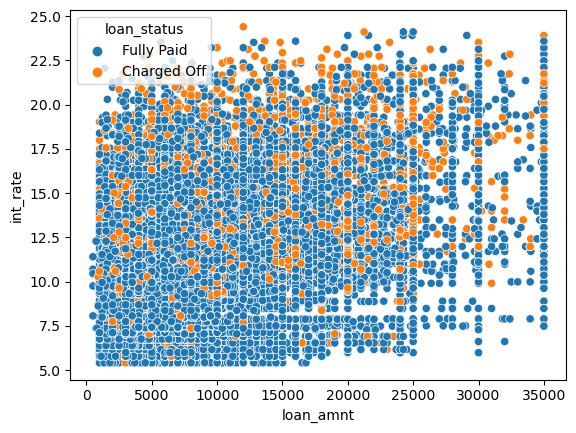

In [196]:
scatter_plt = loan_data[['loan_amnt' ,'int_rate','loan_status']]
sns.scatterplot(data=scatter_plt, x="loan_amnt", y="int_rate", hue="loan_status")
plt.show()

 **Groups & Sub Groups:**
  
  Percentage of Charged Off loans increases as grades and subgrades go up

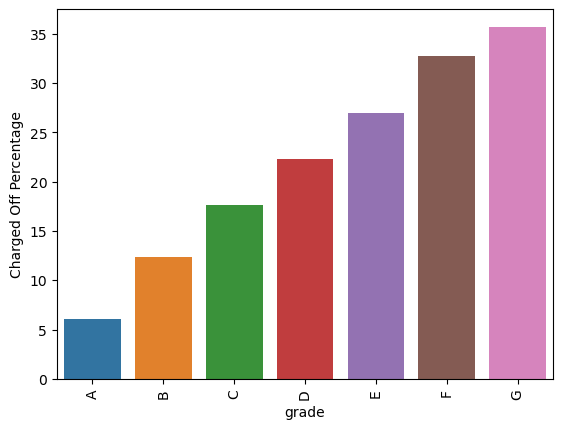

In [197]:
plot_categorical_percentage('grade')


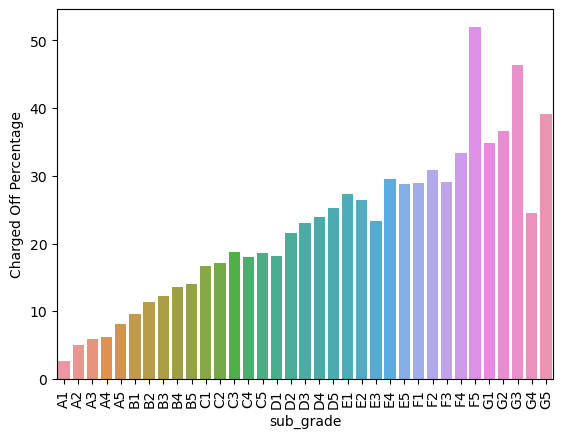

In [198]:
plot_categorical_percentage('sub_grade')

**Home Ownership :**

Chances of Charged of is slightly higher when Home Owner ship falls in 'Other'.

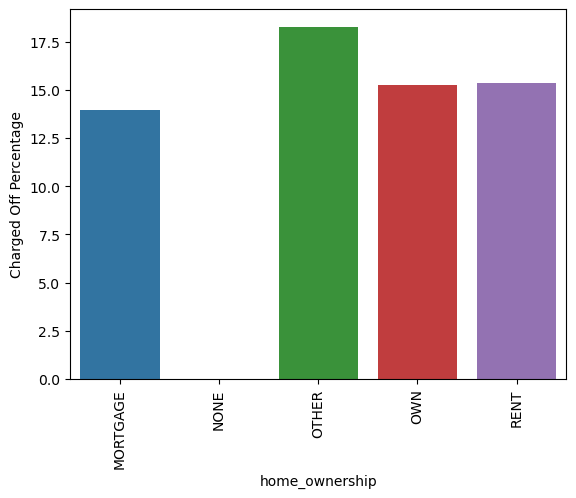

In [199]:
plot_categorical_percentage('home_ownership')

**Annual Income :**

Percentage of Charged Off loans increases as annual income decrease.

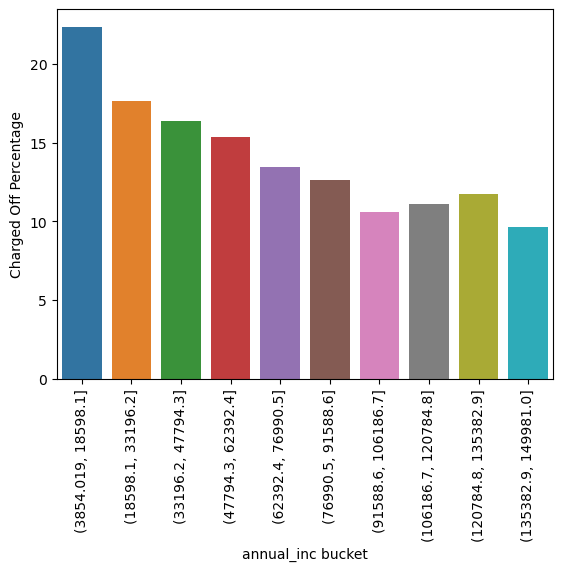

In [200]:
plot_numerical_percentage('annual_inc')

**Purpose :**

Charged off loans is significantly high when purpose of loan is small business

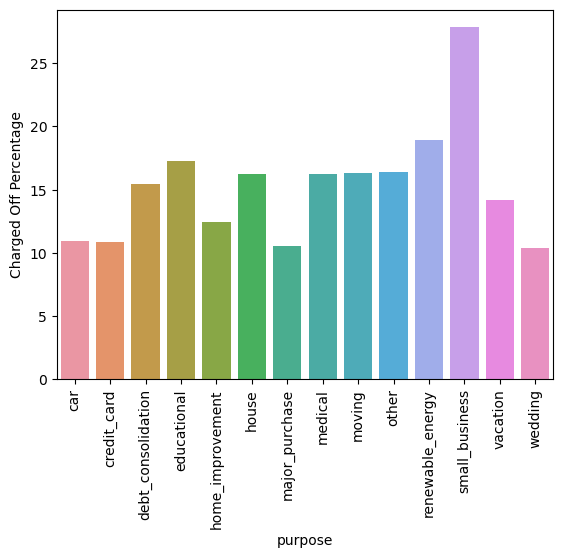

In [201]:
plot_categorical_percentage('purpose')

**Debt to Income Ratio :**

As the Debt to Income ratio goes up, percentage of Charged Off loans also increases.

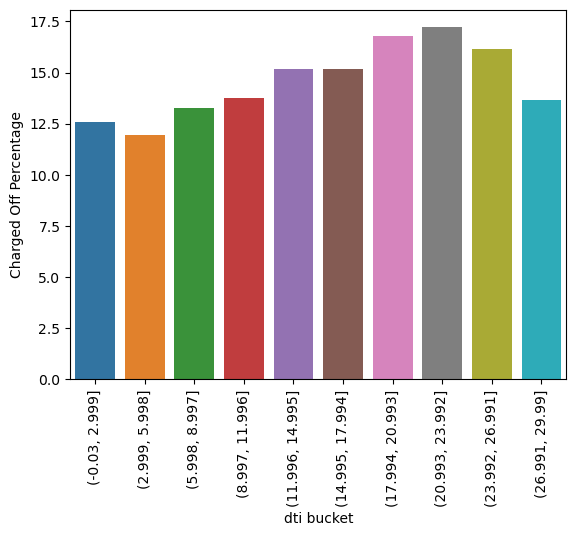

In [202]:
plot_numerical_percentage('dti')